In [1]:
import yfinance as yf
import plotly.graph_objects as go

# Step 1: Get historical stock data using yfinance
ticker_symbol = 'AAPL'  # Replace with the desired stock symbol
start_date = '2018-01-01'  # Replace with the desired start date
end_date = '2023-01-01'  # Replace with the desired end date

# Fetch the historical stock data from Yahoo Finance
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Step 2: Perform time series analysis
# You can use any time series analysis technique of your choice, such as ARIMA, LSTM, etc.
# Here's a simple example using moving averages
window = 30  # Number of days for the moving average

# Calculate the moving average
stock_data['MA'] = stock_data['Close'].rolling(window=window).mean()

# Step 3: Plot the results using Plotly
fig = go.Figure()

# Plot actual stock prices
fig.add_trace(go.Scatter(
    x=stock_data.index,
    y=stock_data['Close'],
    mode='lines',
    name='Actual Price'
))

# Plot moving average
fig.add_trace(go.Scatter(
    x=stock_data.index,
    y=stock_data['MA'],
    mode='lines',
    name=f'{window}-Day Moving Average'
))

# Customize layout
fig.update_layout(
    title=f'Stock Price Prediction - {ticker_symbol}',
    xaxis_title='Date',
    yaxis_title='Stock Price'
)

# Show the plot
fig.show()


[*********************100%***********************]  1 of 1 completed


In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1: Get historical stock data using yfinance
ticker_symbol = 'AMD'  # Replace with the desired stock symbol
start_date = '2018-01-01'  # Replace with the desired start date
end_date = '2023-05-01'  # Replace with the desired end date

# Fetch the historical stock data from Yahoo Finance
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Step 2: Prepare the data
data = stock_data['Close'].values.reshape(-1, 1)

# Scale the data between 0 and 1
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - sequence_length:]

# Create sequences and labels for training
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
        labels.append(data[i+sequence_length])
    return np.array(sequences), np.array(labels)

sequence_length = 30  # Number of previous days to consider for prediction

X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Step 3: Build and train the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Step 4: Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse scaling
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Step 5: Plot the results using Plotly
fig = go.Figure()

# Plot actual prices
fig.add_trace(go.Scatter(
    x=stock_data.index[:len(train_data)],
    y=y_train,
    mode='lines',
    name='Actual Price (Training)'
))

fig.add_trace(go.Scatter(
    x=stock_data.index[len(train_data) + sequence_length - 1: len(stock_data)],
    y=y_test,
    mode='lines',
    name='Actual Price (Testing)'
))

# Plot predicted prices
fig.add_trace(go.Scatter(
    x=stock_data.index[sequence_length: len(train_data) + sequence_length],
    y=train_predictions.flatten(),
    mode='lines',
    name='Predicted Price (Training)'
))

fig.add_trace(go.Scatter(
    x=stock_data.index[len(train_data) + sequence_length - 1: len(stock_data)],
    y=test_predictions.flatten(),
    mode='lines',
    name='Predicted Price (Testing)'
))

# Customize layout
fig.update_layout(
    title=f'Stock Price Prediction - {ticker_symbol}',
    xaxis_title='Date',
    yaxis_title='Stock Price'
)

# Show the plot
fig.show()


[*********************100%***********************]  1 of 1 completed
Epoch 1/10
66/66 [==============================] - 11s 19ms/step - loss: 0.0127
Epoch 2/10
66/66 [==============================] - 1s 20ms/step - loss: 8.5457e-04
Epoch 3/10
66/66 [==============================] - 1s 20ms/step - loss: 7.8124e-04
Epoch 4/10
66/66 [==============================] - 1s 19ms/step - loss: 8.0912e-04
Epoch 5/10
66/66 [==============================] - 1s 20ms/step - loss: 7.8170e-04
Epoch 6/10
66/66 [==============================] - 1s 19ms/step - loss: 7.0303e-04
Epoch 7/10
66/66 [==============================] - 1s 20ms/step - loss: 6.7434e-04
Epoch 8/10
66/66 [==============================] - 1s 20ms/step - loss: 7.1582e-04
Epoch 9/10
66/66 [==============================] - 1s 22ms/step - loss: 6.1931e-04
Epoch 10/10
9/9 [==============================] - 0s 10ms/step


[*********************100%***********************]  1 of 1 completed
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2890.6566832270482
Iteration:      2,   Func. Count:     16,   Neg. LLF: 37.66447134681955
Iteration:      3,   Func. Count:     24,   Neg. LLF: -152.57692259946378
Iteration:      4,   Func. Count:     29,   Neg. LLF: -152.57824293559693
Iteration:      5,   Func. Count:     34,   Neg. LLF: -152.5794063841652
Iteration:      6,   Func. Count:     39,   Neg. LLF: -144.14061291259844
Iteration:      7,   Func. Count:     45,   Neg. LLF: -144.70969593138935
Iteration:      8,   Func. Count:     51,   Neg. LLF: -145.04118821662377
Iteration:      9,   Func. Count:     57,   Neg. LLF: -145.24577959579898
Iteration:     10,   Func. Count:     63,   Neg. LLF: -147.28875332416115
Iteration:     11,   Func. Count:     69,   Neg. LLF: 14558852404.261002
Iteration:     12,   Func. Count:     79,   Neg. LLF: 72600783.18060711
Iteration:     13,   Func. Count:     87,   Neg. L

c:\Users\gsirtori\Anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001291. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




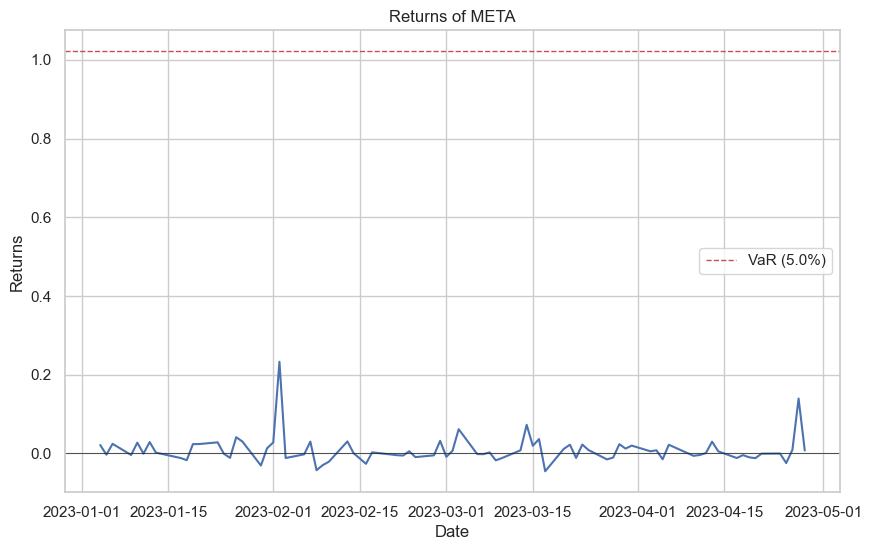

In [9]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import arch

# Step 1: Get historical stock data using yfinance
ticker_symbol = 'META'  # Replace with the desired stock symbol
start_date = '2023-01-01'  # Replace with the desired start date
end_date = '2023-05-01'  # Replace with the desired end date

# Fetch the historical stock data from Yahoo Finance
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Step 2: Prepare the data
returns = stock_data['Close'].pct_change().dropna()

# Step 3: Fit GARCH model and compute VaR
model = arch.arch_model(returns, vol='Garch', p=1, q=1)
model_fit = model.fit()

var_level = 0.05  # VaR level (e.g., 5%)

# Compute VaR using the GARCH model
std_residuals = model_fit.resid / model_fit.conditional_volatility
var = np.percentile(std_residuals, 100 * var_level)

# Step 4: Plot the results using Seaborn
sns.set(style="whitegrid")
fig, ax = sns.mpl.pyplot.subplots(figsize=(10, 6))

# Plot the returns
sns.lineplot(data=returns, ax=ax)
ax.set_title(f'Returns of {ticker_symbol}')
ax.set_xlabel('Date')
ax.set_ylabel('Returns')

# Add VaR line to the plot
ax.axhline(0, color='k', linewidth=0.5)
ax.axhline(-var, color='r', linestyle='--', linewidth=1, label=f'VaR ({var_level*100:.1f}%)')
ax.legend()

# Show the plot
sns.mpl.pyplot.show()


In [18]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as datetime
import time
import os
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%run finance.ipynb #import of the functions defined in the finance.ipynb notebook

start = '2018-01-01' 
end = '2023-05-01'
stock_data = getTickerData('AAPL',start,end)

[*********************100%***********************]  1 of 1 completed


In [19]:
stock_data

,Open,High,Low,Close,Adj Close,Volume,Adj Open,Adj High,Adj Low,Daily Return,Log Return,Cumulative Return,MA 10 Days,MA 20 Days,MA 50 Days
Date,,,,,,,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.831596,102223600,40.3338,40.8411,40.1205,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.824471,118071600,40.8956,41.3744,40.7605,-0.000175,-0.000175,0.999825,NaN,NaN,NaN
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.014103,89738400,40.8980,41.1184,40.7889,0.004645,0.004634,1.004470,NaN,NaN,NaN
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.481064,94640000,41.1113,41.5688,41.0188,0.011385,0.011321,1.015906,NaN,NaN,NaN
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.326996,82271200,41.3270,41.6257,41.2274,-0.003714,-0.003721,1.012133,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-24,165.000000,165.600006,163.889999,165.330002,165.101639,41949600,164.7721,165.3713,163.6636,0.001879,0.001877,4.043477,164.572369,163.484373,156.641737
2023-04-25,165.190002,166.309998,163.729996,163.770004,163.543793,48714100,164.9618,166.0803,163.5038,-0.009436,-0.009480,4.005324,164.868959,163.758494,156.896584
2023-04-26,163.059998,165.279999,162.800003,163.759995,163.533798,45498800,162.8348,165.0517,162.5751,-0.000061,-0.000061,4.005080,165.234453,164.063572,157.094510


c:\Users\gsirtori\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<Axes: xlabel='Daily Return', ylabel='Density'>

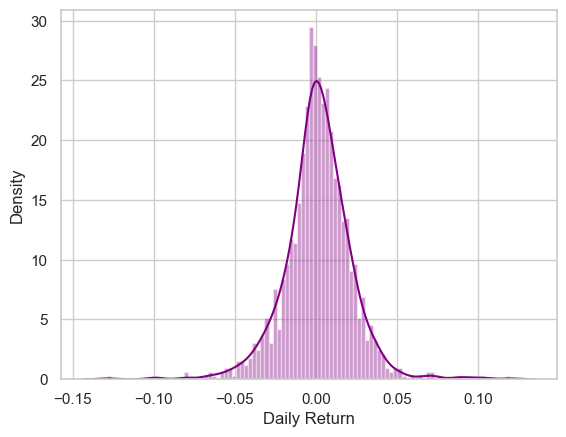

In [20]:
sns.distplot(stock_data['Daily Return'],bins = 100,color='purple')

In [21]:
stock_data['Daily Return'].quantile(0.05)

-0.03178313707675776

In [22]:
stock_data['Daily Return'].mean()

0.001278946679732816

In [23]:
stock_data['Daily Return'].std()

0.020765277900705745

Text(0.5, 1.0, 'Monte Carlo Analysis for Apple')

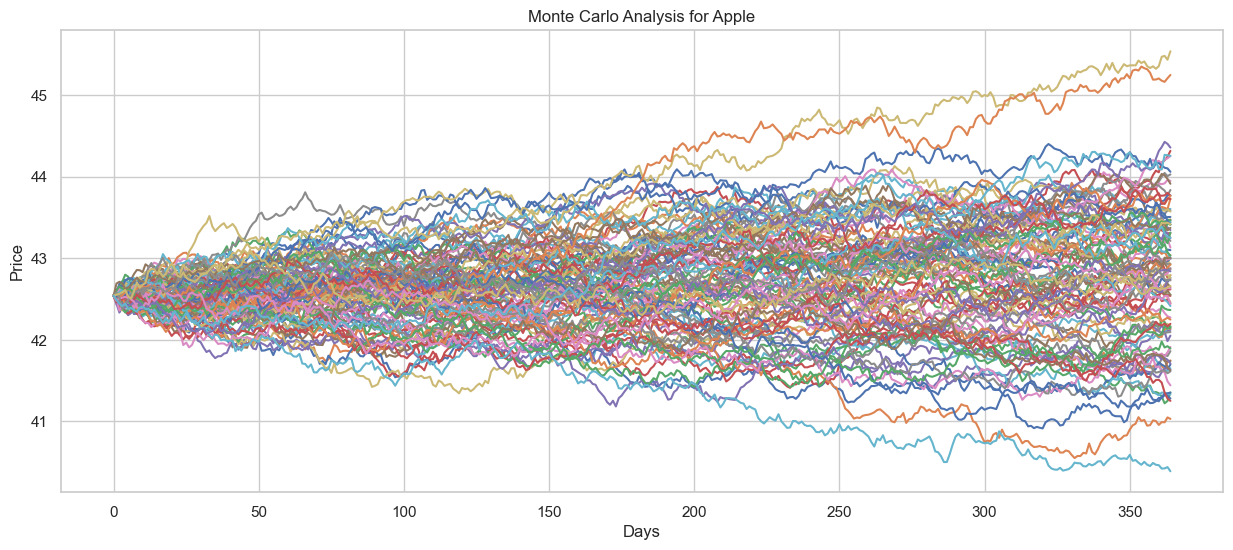

In [25]:
plt.figure(figsize=(15,6))

for run in range(100):
    plt.plot(stock_monte_carlo( stock_data['Open'][0],365,stock_data['Daily Return'].mean(),stock_data['Daily Return'].std()))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Apple')

In [26]:
#make the simulation run a function
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo( stock_data['Open'][0],365,stock_data['Daily Return'].mean(),stock_data['Daily Return'].std())[365-1]

Text(0.5, 1.0, 'Final price distribution for Apple Stock after 365 days')

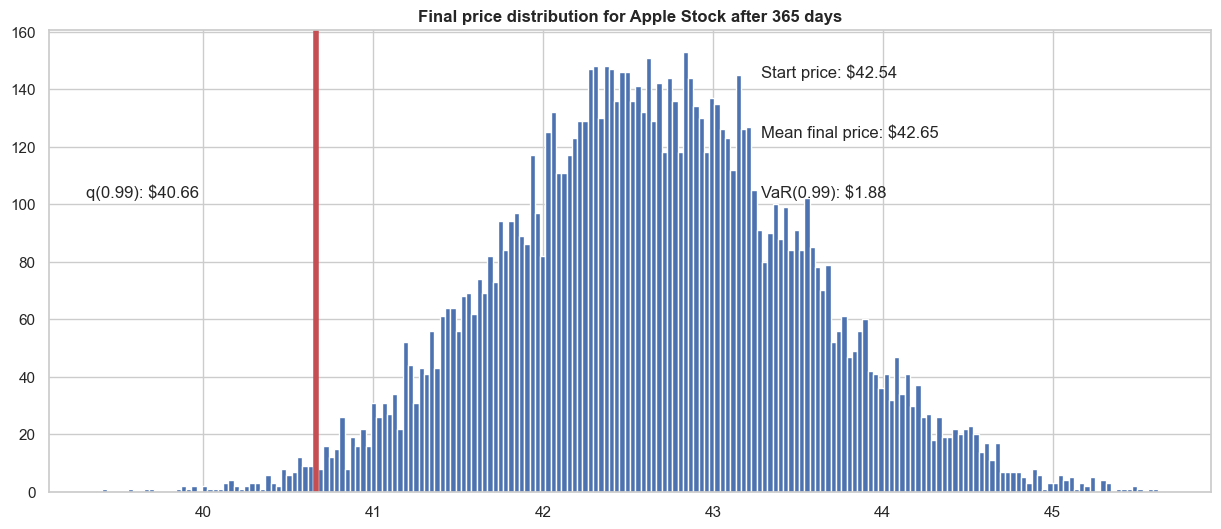

In [28]:
q = np.percentile(simulations,1)

plt.figure(figsize=(15,6))

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %stock_data['Open'][0])

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (stock_data['Open'][0] -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Apple Stock after %s days" %365, weight='bold')